# Pipelines, grid search i text mining

Comencem a familiaritzar-nos amb Pipelines, grid search i text mining! Comencem amb uns quants exercicis bàsics.

**Exercici 1**

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

**Exercici 2**

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

**Exercici 3**

Treu les stopwords i realitza stemming al teu conjunt de dades.

**Exercici 4**

Realitza sentiment analysis al teu conjunt de dades.

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import matplotlib.pyplot as plt

import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

# Exercici 1

Reproducimos https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

### Data
[BIG MART SALES PREDICTION](https://www.kaggle.com/devashish0507/big-mart-sales-prediction) 

In [2]:
# Read csv
df_raw = pd.read_csv("./archive/Train.csv")

In [3]:
# Estrucutra
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Muestra
df_raw.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8410,NCS06,7.935,Low Fat,0.000000,Household,263.6910,OUT046,1997,Small,Tier 1,Supermarket Type1,788.9730
4646,NCA05,20.750,Low Fat,0.025126,Health and Hygiene,150.4734,OUT035,2004,Small,Tier 2,Supermarket Type1,890.8404
4365,DRJ49,6.865,Low Fat,0.014022,Soft Drinks,127.1652,OUT045,2002,NaN,Tier 2,Supermarket Type1,1291.6520
685,FDS10,NaN,Low Fat,0.035015,Snack Foods,182.0318,OUT027,1985,Medium,Tier 3,Supermarket Type3,5954.2494
3726,FDB58,NaN,Regular,0.013431,Snack Foods,143.7154,OUT027,1985,Medium,Tier 3,Supermarket Type3,4821.7236


In [5]:
# Check for the null values
df_raw.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# Impute missing values in item weight by mean
df_raw.Item_Weight.fillna(df_raw.Item_Weight.mean(), inplace=True)
# Impute outlet size in training data by mode
df_raw.Outlet_Size.fillna(df_raw.Outlet_Size.mode()[0], inplace=True)

In [7]:
# Create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)

# Encode the categorical variables
df_raw = OHE.fit_transform(df_raw)

/Users/luis/opt/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [8]:
# Create an object of the StandardScaler
scaler = StandardScaler()
# Fit with the Item_MRP
scaler.fit(np.array(df_raw.Item_MRP).reshape(-1,1))
# Transform the data
df_raw.Item_MRP = scaler.transform(np.array(df_raw.Item_MRP).reshape(-1,1))

In [9]:
# Muestra
df_raw.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,Item_Type_Snack Foods,Item_Type_Frozen Foods,Item_Type_Breakfast,Item_Type_Health and Hygiene,Item_Type_Hard Drinks,Item_Type_Canned,Item_Type_Breads,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP,Outlet_Identifier_OUT049,Outlet_Identifier_OUT018,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT027,Outlet_Identifier_OUT045,Outlet_Identifier_OUT017,Outlet_Identifier_OUT046,Outlet_Identifier_OUT035,Outlet_Identifier_OUT019,Outlet_Establishment_Year,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
1097,FDK10,12.857645,0,1,0,0,0,0.040163,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.645131,0,0,0,0,1,0,0,0,0,0,1985,1,0,0,0,1,0,0,0,0,1,3415.5540
1860,FDA01,15.000000,0,1,0,0,0,0.054600,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1.308825,0,1,0,0,0,0,0,0,0,0,2009,1,0,0,0,1,0,0,1,0,0,644.4944
1186,FDZ47,20.700000,0,1,0,0,0,0.079420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.661436,1,0,0,0,0,0,0,0,0,0,1999,1,0,0,1,0,0,1,0,0,0,1488.0630
7875,FDO09,12.857645,0,1,0,0,0,0.124668,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.928625,0,0,0,0,1,0,0,0,0,0,1985,1,0,0,0,1,0,0,0,0,1,5522.8110
5269,FDB41,19.000000,0,1,0,0,0,0.097710,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.482558,0,1,0,0,0,0,0,0,0,0,2009,1,0,0,0,1,0,0,1,0,0,614.5334


In [10]:
# Save csv
df_raw.to_csv("df_clean.csv")

### Model building

In [11]:
# Read csv
df_clean = pd.read_csv("df_clean.csv", index_col=[0])

In [12]:
# Separate the independent and target variable 
df_clean_X = df_clean.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
df_clean_Y = df_clean['Item_Outlet_Sales']

In [13]:
# Randomly split the data
train_x, test_x, train_y, test_y = train_test_split(df_clean_X, df_clean_Y,test_size=0.25,random_state=0)

In [14]:
# Create an object of the LinearRegression Model
model_LR = LinearRegression()

# Fit the model with the training data
model_LR.fit(train_x, train_y)

# Predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  1120.4035486046475
RMSE on test data:  1148.7085083556728


In [15]:
# Create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# Fit the model with the training data
model_RFR.fit(train_x, train_y)

# Predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  898.35259725299
RMSE on test data:  1116.6015970769595


Random Forest performs way better. 

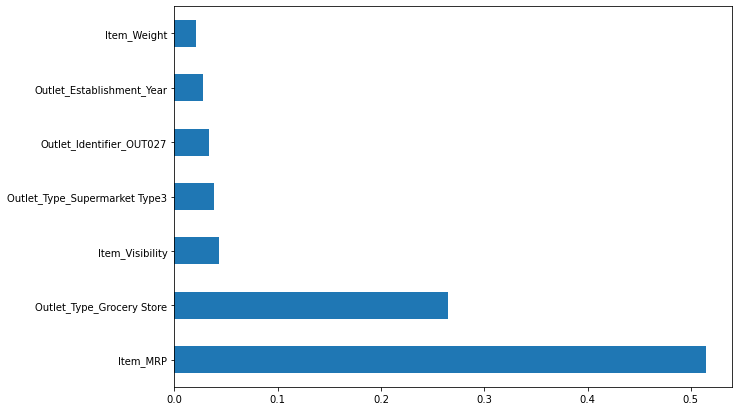

In [16]:
# Plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');

In [17]:
# Training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]
# Test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

# Create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)

# Fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)

# Predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)

# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))

RMSE on train data:  899.8582438552843
RMSE on test data:  1117.7016540152065


We achieve the same performance using only the seven most effective attributes, creating a less complex model.

### Pipeline

Selected Features and Preprocessing Steps

- **Item_MRP:** It holds the price of the products. During the preprocessing step we used a standard scaler to scale this values.

- **Outlet_Type_Grocery_Store:** A binary column which indicates if the outlet type is a grocery store or not. To use this information in the model building process, we will add a binary feature in the existing data that contains 1 (if outlet type is a grocery store) and 0 ( if outlet type is something else).

- **Item_Visibility:** Denotes visibility of products in the store. Since this variable had a small value range and no missing values, we didn’t apply any preprocessing steps on this variable.

- **Outlet_Type_Supermarket_Type3:** Another binary column indicating if the outlet type is a “supermarket_type_3” or not. To capture this information we will create binary feature that stores 1 (if outlet type is supermarket_type_3) and 0 (othewise).

- **Outlet_Identifier_OUT027:** This feature specifies whether the outlet identifier is “OUT027” or not. Similar to the last previous example, we will create a separate column that carries 1 (if outlet type is grocery store) and 0 (otherwise).

- **Outlet_Establishment_Year:** The Outlet_Establishment_Year describes year of establishment of the stores. Since we did not perform any transformation on values in this column, we will not preprocess it in the pipeline as well.

- **Item_Weight:** During the preprocessing steps we observed that Item_Weight had missing values. These missing values were imputed using the average of the column. This has to be taken into account while building the machine learning pipeline.

In [18]:
# Read the training data set
data = pd.read_csv("./archive/Train.csv")

# Seperate the independent and target variables
data_x = data.drop(columns=['Item_Outlet_Sales'])
data_y = data['Item_Outlet_Sales']

# Randomly split the data
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y,test_size=0.25,random_state=0)

In [19]:
# Define the class OutletTypeEncoder
# This will be our custom transformer that will create 3 new binary columns
# Custom transformer must have methods fit and transform
class OutletTypeEncoder(BaseEstimator):

    def __init__(self):
        pass

    def fit(self, documents, y=None):
        return self

    def transform(self, x_dataset):
        x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
        x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
        x_dataset['outlet_identifier_OUT027'] = (x_dataset['Outlet_Identifier'] == 'OUT027')*1
        
        return x_dataset

In [20]:
# Pre-processsing step
# Drop the columns - 
# Impute the missing values in column Item_Weight by mean
# Scale the data in the column Item_MRP
pre_process = ColumnTransformer(
    remainder='passthrough',
    transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                            'Outlet_Identifier',
                                            'Item_Fat_Content',
                                            'Item_Type',
                                            'Outlet_Identifier',
                                            'Outlet_Size',
                                            'Outlet_Location_Type',
                                            'Outlet_Type']),
                  ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                  ('scale_data', StandardScaler(),['Item_MRP'])])

In [21]:
# Define the Pipeline

"""
Step1: get the oultet binary columns
Step2: pre processing
Step3: Train a Random Forest Model
"""

model_pipeline = Pipeline(steps=[('get_outlet_binary_columns', OutletTypeEncoder()), 
                                 ('pre_processing',pre_process),
                                 ('random_forest', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])

# Fit the pipeline with the training data
model_pipeline.fit(train_x,train_y)

# Predict target values on the training data
predict_train = model_pipeline.predict(train_x)

<ipython-input-19-6b8a528b2c5d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
<ipython-input-19-6b8a528b2c5d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
<ipython-input-19-6b8a528b2c5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [22]:
# Predict target values on the test data
predict_test = model_pipeline.predict(test_x)

<ipython-input-19-6b8a528b2c5d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
<ipython-input-19-6b8a528b2c5d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
<ipython-input-19-6b8a528b2c5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [23]:
# Root Mean Squared Error on train data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  899.8722708734629
RMSE on test data:  1117.8090863194816


### Grid Search

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'random_forest__n_estimators': n_estimators,
               'random_forest__max_features': max_features,
               'random_forest__max_depth': max_depth,
               'random_forest__min_samples_split': min_samples_split,
               'random_forest__min_samples_leaf': min_samples_leaf,
               'random_forest__bootstrap': bootstrap}

In [25]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_pipeline, param_distributions = random_grid, 
                               n_iter = 30, cv = 3, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x, train_y)

<ipython-input-19-6b8a528b2c5d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
<ipython-input-19-6b8a528b2c5d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
<ipython-input-19-6b8a528b2c5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('get_outlet_binary_columns',
                                              OutletTypeEncoder()),
                                             ('pre_processing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('drop_columns',
                                                                               'drop',
                                                                               ['Item_Identifier',
                                                                                'Outlet_Identifier',
                                                                                'Item_Fat_Content',
                                                                                'Item_Type',
                                                                                'Outlet_Identifier',
   

In [26]:
# Best Params
rf_random.best_params_

{'random_forest__n_estimators': 200,
 'random_forest__min_samples_split': 5,
 'random_forest__min_samples_leaf': 2,
 'random_forest__max_features': 'sqrt',
 'random_forest__max_depth': 10,
 'random_forest__bootstrap': True}

In [27]:
# Best estimator
best_random = rf_random.best_estimator_

#Predictions
predict_train = best_random.predict(train_x)
predict_test = best_random.predict(test_x)

# Root Mean Squared Error on train data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ', mean_squared_error(test_y, predict_test)**(0.5))

RMSE on train data:  954.5178234868895
RMSE on test data:  1107.3994076815104


<ipython-input-19-6b8a528b2c5d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_grocery_store'] = (x_dataset['Outlet_Type'] == 'Grocery Store')*1
<ipython-input-19-6b8a528b2c5d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_dataset['outlet_supermarket_3'] = (x_dataset['Outlet_Type'] == 'Supermarket Type3')*1
<ipython-input-19-6b8a528b2c5d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Tras la optimización de parámetros obtenemos un error mayor en el training set, pero conseguimos reducir el overfitting con la validación cruzada. De ese modo conseguimos reducir el error en el conjunto de test.

# Exercici 2

### Data
[Harry Potter and the Philosopher's Stone](https://github.com/formcept/whiteboard) 

In [28]:
# Read txt
book_file = open("Book 1 - The Philosopher's Stone.txt", "r")
book = book_file.read()

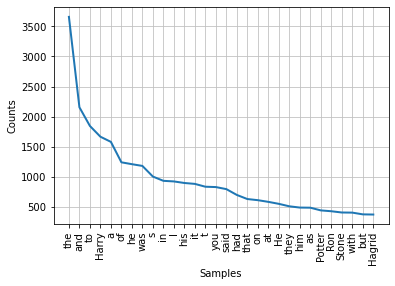

In [29]:
# Word freq
tokenized_book = word_tokenize(book)
# Remove punctuation
tokenized_book= [word for word in tokenized_book if word.isalnum()]
# Freq
fdist = FreqDist(tokenized_book)
# 30 most common words
fdist.plot(30,cumulative=False)
plt.show()

# Exercici 3

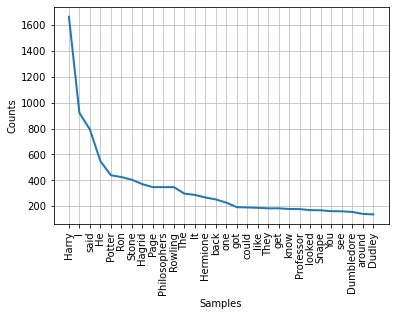

In [30]:
# Stop words list
stop_words=set(stopwords.words("english"))

# Filter
filtered_book=[]
for w in tokenized_book:
    if w not in stop_words:
        filtered_book.append(w)

# Word freq
fdist = FreqDist(filtered_book)

# 30 most common words
fdist.plot(30,cumulative=False)
plt.show()

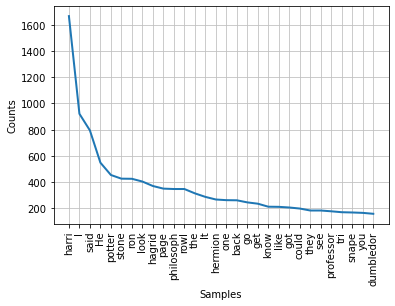

In [31]:
# Stemming
ps = PorterStemmer()

stemmed_book=[]
for w in filtered_book:
    stemmed_book.append(ps.stem(w))

# Word freq
fdist = FreqDist(stemmed_book)

# 30 most common words
fdist.plot(30,cumulative=False)
plt.show()

# Exercici 4

In [32]:
# Polarity of the text
book_sent = TextBlob(book)
book_sent.sentiment

Sentiment(polarity=0.05043101632256281, subjectivity=0.47569149663568355)

Al tratarse de una novela no es de extrañar que la polaridad del texto tome un valor cercano a zero. Este parámetro toma valores dentro del rango [-1,1], siendo -1 negativo y 1 positivo. Nuestro texto se puede classificar como neutro. Por otro lado, la subjetividad toma valores en el rango [0,1], siendo 0 titalmente objetivo y 1 totalmente subjetivo. Nuestro texto se encuentra en un punto intermedio.